In [1]:
import numpy as np

In [2]:
import doodler_forall as dd
import utils as u
# import model as m
import functions as f
import network as n


In [3]:
config = u.read_config('configs/config.yaml')

In [4]:
global_config, layers_config = u.adapt_config(config)

In [5]:
global_config.__dict__

{'loss': 'cross_entropy', 'lrate': 1, 'wreg': 0.1, 'wrt': 'L2'}

In [6]:
layers_config.__dict__

{'input': 20,
 'hidden_layers': [{'size': 20, 'act': 'sigmoid', 'lrate': 1},
  {'size': 5, 'act': 'sigmoid', 'br': '(0 1)'}],
 'type': 'softmax'}

In [7]:
model = n.Network(global_config, layers_config)

|----------------------------------------|
| GLOBAL   |                             |
|----------------------------------------|
| loss     | cross_entropy               |
| lrate    | 1                           |
| wreg     | 0.1                         |
| wrt      | L2                          |
|----------------------------------------|
| LAYERS   |                             |
|----------------------------------------|
| input    | 20                          |
| layer 1  |                             |
|          | size: 20                    |
|          | act: sigmoid                |
|          | lrate: 1                    |
| layer 2  |                             |
|          | size: 5                     |
|          | act: sigmoid                |
|          | br: (0 1)                   |
| type     | softmax                     |
|----------------------------------------|


In [8]:
model.__dict__

{'loss': 'cross_entropy',
 'lrate': 1,
 'wreg': 0.1,
 'wrt': 'L2',
 'input': 20,
 'type': 'softmax',
 'layers': [<layer.Layer at 0x120e7ffa0>, <layer.Layer at 0x120e7fdf0>],
 'global_config': <utils.GlobalConfig at 0x120e7fbb0>,
 'layers_config': <utils.LayersConfig at 0x120e7e830>}

In [9]:
dataset_name = 'dataset_2024-02-09_200_5_20'
training_set, testing_set, val_set = u.load_dataset(dataset_name)

In [10]:
X_train, y_train = training_set[0], training_set[1]
X_val, y_val = val_set[0], val_set[1]
X_test, y_test = testing_set[0], testing_set[1]

Epoch: 1,     loss: 1.6094379124340954, val loss: 1.6094379124340954
Epoch: 2,     loss: 1.6094837753266569, val loss: 1.6095425224111857
Epoch: 3,     loss: 1.6096091808949546, val loss: 1.609947776154722
Epoch: 4,     loss: 1.6100827639246773, val loss: 1.6122368960641624
Epoch: 5,     loss: 1.6153738319860114, val loss: 1.6378007838550268
Epoch: 6,     loss: 1.6189837187027303, val loss: 1.644829008963069
Epoch: 7,     loss: 1.6098422763674267, val loss: 1.6122002977317327
Epoch: 8,     loss: 1.60970339629594,   val loss: 1.611104112589608
Epoch: 9,     loss: 1.6096353969760628, val loss: 1.6105723904320186
Epoch: 10,    loss: 1.6095951032319002, val loss: 1.6102673520050144
Epoch: 11,    loss: 1.609568534098503,  val loss: 1.6100740388095987
Epoch: 12,    loss: 1.6095497494045952, val loss: 1.6099429777681988
Epoch: 13,    loss: 1.6095357936603354, val loss: 1.6098496358070744
Epoch: 14,    loss: 1.609525032427239,  val loss: 1.6097806005546602
Epoch: 15,    loss: 1.609516489910980

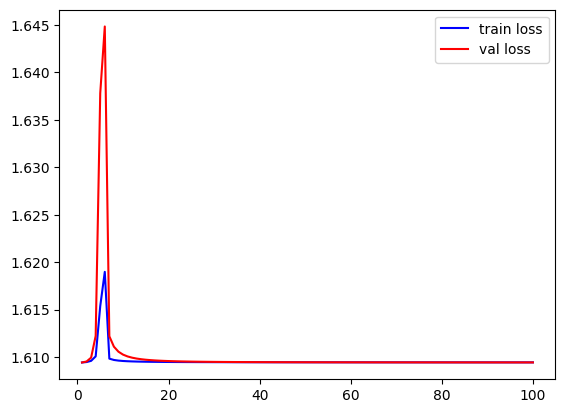

In [11]:
# y_pred = model.fit(X_train, y_train, epoch=1000)
y_pred = model.fit(X_train, y_train, X_val, y_val, epoch=100)
# y_pred = model.fit(X_train, y_train, X_val, y_val, X_test, y_test, 20)

In [12]:
y_pred = model.forward_pass(X_train.reshape(-1, 20**2))
y_pred

array([[0.19999829, 0.19998787, 0.20000195, 0.20002204, 0.19998985],
       [0.19999773, 0.19998363, 0.20000272, 0.20002964, 0.19998627],
       [0.19999822, 0.19998731, 0.20000205, 0.20002304, 0.19998938],
       [0.19999791, 0.199985  , 0.20000247, 0.20002719, 0.19998743],
       [0.19999853, 0.19998965, 0.20000163, 0.20001884, 0.19999135],
       [0.19999807, 0.19998617, 0.20000225, 0.20002509, 0.19998842],
       [0.19999742, 0.19998124, 0.20000317, 0.20003392, 0.19998425],
       [0.19999833, 0.19998814, 0.2000019 , 0.20002155, 0.19999008],
       [0.19999817, 0.19998693, 0.20000211, 0.20002372, 0.19998906],
       [0.1999983 , 0.19998792, 0.20000194, 0.20002195, 0.1999899 ],
       [0.19999816, 0.19998687, 0.20000213, 0.20002383, 0.19998901],
       [0.19999826, 0.19998761, 0.20000199, 0.2000225 , 0.19998964],
       [0.19999834, 0.19998822, 0.20000188, 0.2000214 , 0.19999015],
       [0.19999734, 0.19998061, 0.20000329, 0.20003504, 0.19998372],
       [0.19999804, 0.19998598, 0.

In [13]:
dL = f.d_loss['cross_entropy'](y_train, y_pred)

In [14]:
model.layers[1].dw

array([[-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.00049868, -0.00050541, -0.00052483],
       [-0.00051586, -0.00049754, -0.0

In [15]:
# model.layers[1].W -= model.layers[1].dw

In [16]:
model.layers[1].W

array([[-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.38332043, -0.37310373, -0.38941306],
       [-0.38475526, -0.39126485, -0.3

In [17]:
f.sigmoid

<function functions.sigmoid(x)>

In [18]:
y_val.shape

(10, 5)

In [19]:
model.print_config()

|----------------------------------------|
| GLOBAL   |                             |
|----------------------------------------|
| loss     | cross_entropy               |
| lrate    | 1                           |
| wreg     | 0.1                         |
| wrt      | L2                          |
|----------------------------------------|
| LAYERS   |                             |
|----------------------------------------|
| input    | 20                          |
| layer 1  |                             |
|          | size: 20                    |
|          | act: sigmoid                |
|          | lrate: 1                    |
| layer 2  |                             |
|          | size: 5                     |
|          | act: sigmoid                |
|          | br: (0 1)                   |
| type     | softmax                     |
|----------------------------------------|


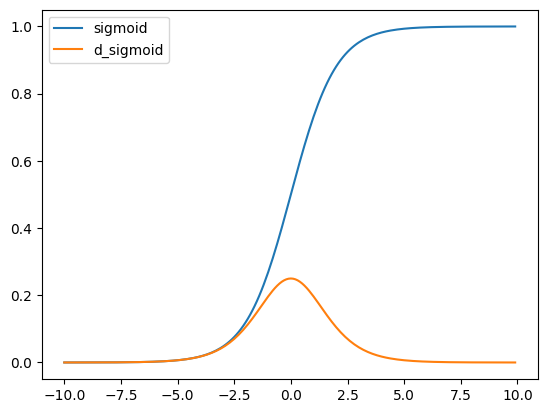

In [20]:
from matplotlib import pyplot as plt

x = np.arange(- 10, 10, .1)
s = f.sigmoid(x)
d_s = f.d_sigmoid(s)

plt.plot(x, s, label='sigmoid')
plt.plot(x, d_s, label='d_sigmoid')
plt.legend()